In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
df=pd.read_csv("car.csv")
df

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [55]:
label=LabelEncoder()
for i in df.select_dtypes(include='object'):
    df[i]=label.fit_transform(df[i])
df

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [56]:
x=df.drop("class",axis=1)
y=df["class"]

In [57]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
        -1.22474487],
       ...,
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         0.        ],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         1.22474487],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
        -1.22474487]], shape=(1728, 6))

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

In [59]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [60]:
y_pred=model.predict(x_test)
y_pred

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0,
       1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 3,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [61]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9161849710982659

In [62]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 69,   2,  12,   1],
       [  2,   9,   0,   0],
       [ 11,   0, 223,   0],
       [  1,   0,   0,  16]])

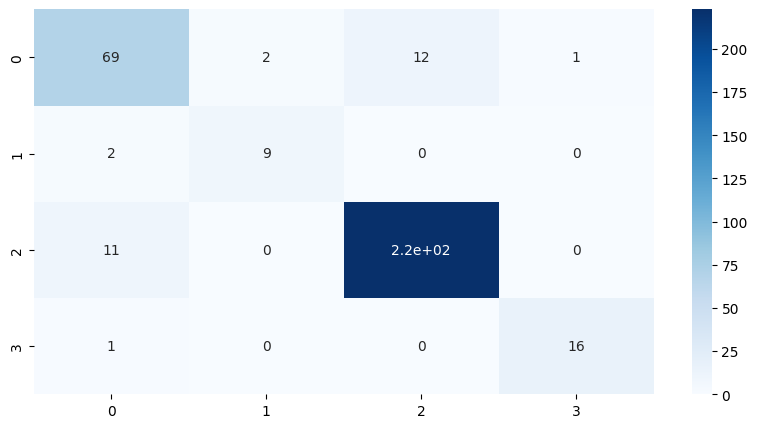

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()